In [ ]:
url='https://raw.githubusercontent.com/kmsravindra/ML-AI-experiments/master/AI/LSTM-time_series/sine-wave.csv'
column_name=['values']
data=pd.read_csv(url,header=None,names=column_name)

In [ ]:
data

,values
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402
...,...
4996,0.680667
4997,0.725324
4998,0.767118
4999,0.805885


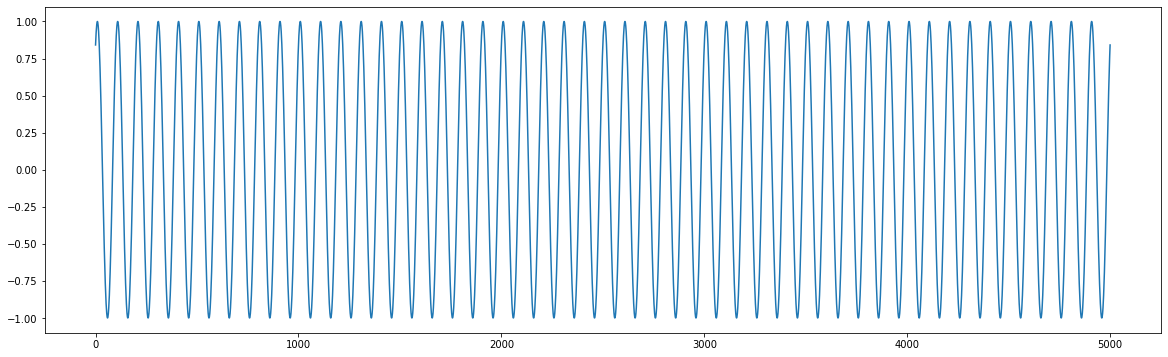

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(data['values'])

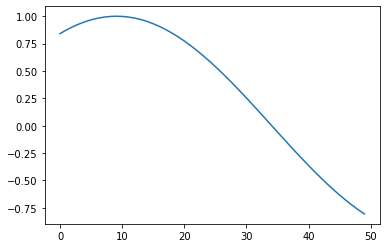

In [ ]:
#visualizign first 50 
plt.plot(data['values'][:50])
plt.show()

In [ ]:
data['values'].head()

0    0.841471
1    0.873736
2    0.902554
3    0.927809
4    0.949402
Name: values, dtype: float64

In [ ]:
0.84 0.87 0.90 0.92
0.87 0.9 0.92 0.94

In [ ]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
scaled=scaler.fit_transform(data.values)
series=pd.DataFrame(scaled)

In [ ]:
series.head

<bound method NDFrame.head of              0
0     0.841483
1     0.873749
2     0.902566
3     0.927822
4     0.949416
...        ...
4996  0.680677
4997  0.725334
4998  0.767129
4999  0.805896
5000  0.841483

[5001 rows x 1 columns]>

In [ ]:
Window_size=4 
#shift function that shifts entiere column b number we specify
series_s=series.copy()
for i in range(Window_size):
  series=pd.concat([series,series_s.shift(-(i+1))],axis=1)

series.dropna(axis=0,inplace=True)


In [ ]:
series

,0,0,0,0,0
0,0.841483,0.873749,0.902566,0.927822,0.949416
1,0.873749,0.902566,0.927822,0.949416,0.967263
2,0.902566,0.927822,0.949416,0.967263,0.981292
3,0.927822,0.949416,0.967263,0.981292,0.991449
4,0.949416,0.967263,0.981292,0.991449,0.997693
...,...,...,...,...,...
4992,0.477101,0.531344,0.583490,0.633333,0.680677
4993,0.531344,0.583490,0.633333,0.680677,0.725334
4994,0.583490,0.633333,0.680677,0.725334,0.767129
4995,0.633333,0.680677,0.725334,0.767129,0.805896


In [ ]:
#the input for lstm is 3d array(num_samples,num_time_steps,num_feat)


In [ ]:
series.shape

(4997, 5)

In [ ]:
nrow=round(0.8*series.shape[0])

In [ ]:
train=series.iloc[:nrow,:]
test=series.iloc[nrow:,:]

In [ ]:
from sklearn.utils import shuffle
train=shuffle(train)

In [ ]:
train

,0,0,0,0,0
2336,-0.120065,-0.182166,-0.243547,-0.303967,-0.363188
387,0.182166,0.243547,0.303967,0.363188,0.420975
2253,-0.927822,-0.949416,-0.967263,-0.981292,-0.991449
1510,0.998360,0.992780,0.983282,0.969904,0.952697
1951,-0.873749,-0.902566,-0.927822,-0.949416,-0.967263
...,...,...,...,...,...
883,-0.068090,-0.005310,0.057491,0.120065,0.182166
549,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822
641,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333
752,-0.902566,-0.927822,-0.949416,-0.967263,-0.981292


In [ ]:
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]

In [ ]:
train_y

2336   -0.363188
387     0.420975
2253   -0.991449
1510    0.952697
1951   -0.967263
          ...   
883     0.182166
549    -0.927822
641    -0.633333
752    -0.981292
1625    0.314067
Name: 0, Length: 3998, dtype: float64

In [ ]:
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]

In [ ]:
train_x=train_x.values
train_y=train_y.values
test_x=test_x.values
test_y=test_y.values


In [ ]:
train_x.shape
test_x.shape

(999, 4)

In [ ]:
#lstm takes input in 3d


In [ ]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [ ]:
train_x.shape

(3998, 4, 1)

In [ ]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#definign lstm model
model=Sequential()
model.add(LSTM(128,input_shape=(4,1),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4, 128)            66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 128)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 461,057
Trainable params: 461,057
Non-trainable params: 0
________________________________________________

In [ ]:
start=time.time()
model.fit(train_x,train_y,batch_size=512,epochs=3,validation_split=0.1)

Epoch 1/3
8/8 [==============================] - 6s 281ms/step - loss: 0.3940 - val_loss: 0.0404
Epoch 2/3
8/8 [==============================] - 1s 153ms/step - loss: 0.0474 - val_loss: 0.0313
Epoch 3/3
8/8 [==============================] - 1s 152ms/step - loss: 0.0291 - val_loss: 0.0369


In [ ]:
preds=model.predict(test_x)

In [ ]:
preds = scaler.inverse_transform(preds)

In [ ]:
actuals = (test_y)

In [ ]:
mean_squared_error(actuals,preds)

0.03713570064727652

In [ ]:
acuals=(test_y)

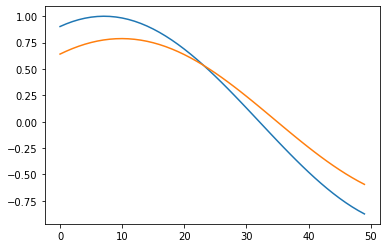

In [ ]:
pyplot.plot(actuals[:50])
pyplot.plot(preds[:50])
pyplot.show()
